In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix, mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


<h1>Data Exploration</h1>

In [46]:
htf=pd.read_csv("heart.csv")
htf

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [47]:
htf.head() # top 5 rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [48]:
htf.tail() # top 5 last rows

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [49]:
# full information
htf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [50]:
htf.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [51]:
htf.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

<h1>Data Cleaning </h1>

In [52]:
htf.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no null values in the data

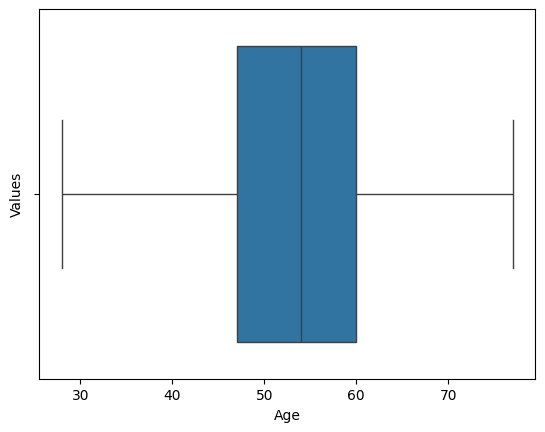

Potential Outliers:


In [53]:
sns.boxplot(x=htf['Age'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.show()
# Identify potential outliers using numerical methods
q1 = htf['Age'].quantile(0.25)
q3 = htf['Age'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

potential_outliers = htf[(htf['Age'] < lower_bound) | (htf['Age'] > upper_bound)]
print("Potential Outliers:")


<Axes: >

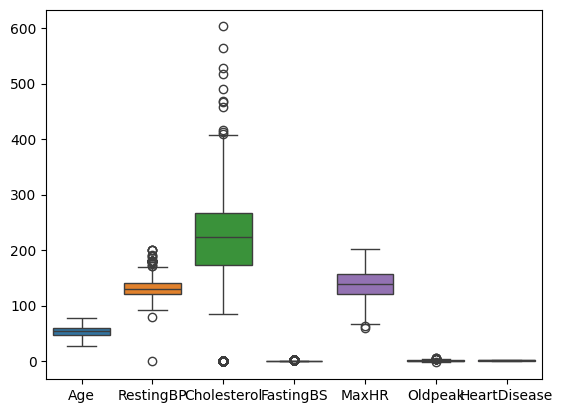

In [54]:
sns.boxplot(htf)

In [55]:
htf['Age'] = pd.to_numeric(htf['Age'], errors='coerce')


# Now, calculate the quartiles and fences
q1 = htf['Age'].quantile(0.25)
q3 = htf['Age'].quantile(0.75)
lower_fence = q1 - 1.5 * (q3 - q1)
upper_fence = q3 + 1.5 * (q3 - q1)

# Identify potential outliers
outliers_tukey = htf[(htf['Age'] < lower_fence) | (htf['Age'] > upper_fence)]
print("Potential Outliers:")
print(outliers_tukey)

Potential Outliers:
Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


In [56]:
htf.duplicated().sum()

0

<h1> Data Visualization</h1>

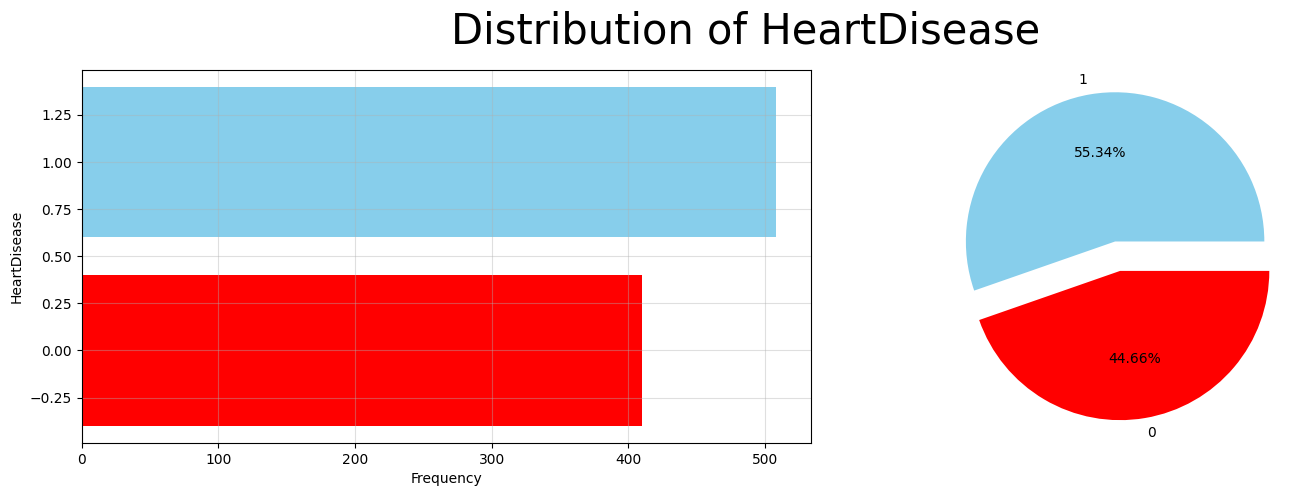

In [57]:
types=htf['HeartDisease'].value_counts()
colors=['skyblue','red']

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('HeartDisease')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.1] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of HeartDisease', fontsize=30)
plt.tight_layout(pad=1)
plt.show()

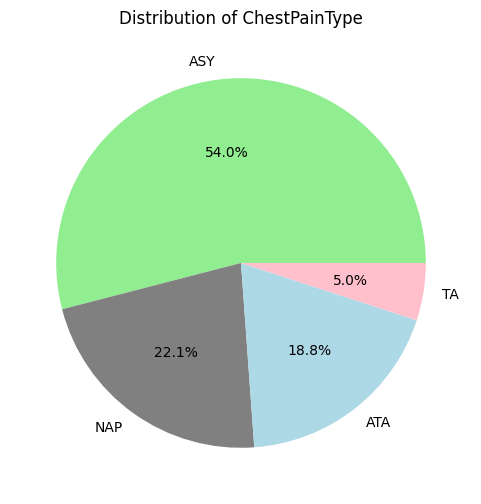

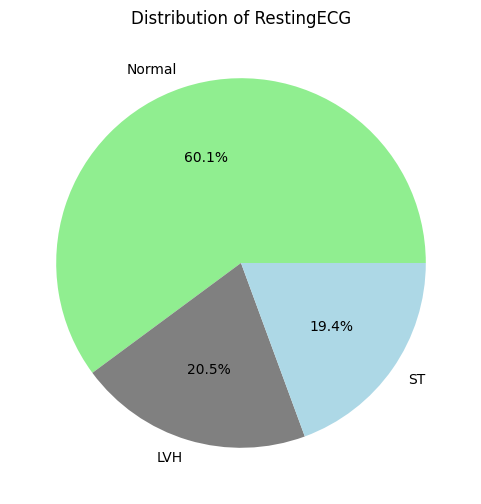

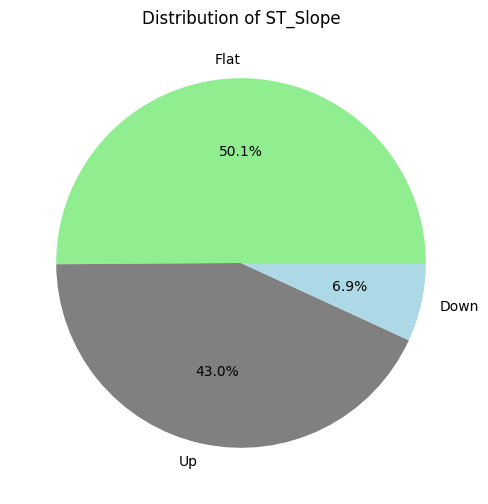

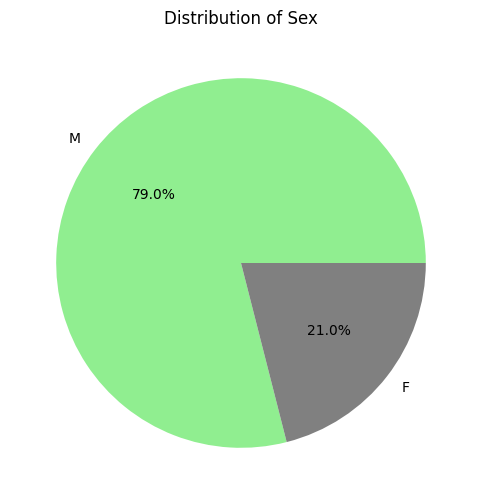

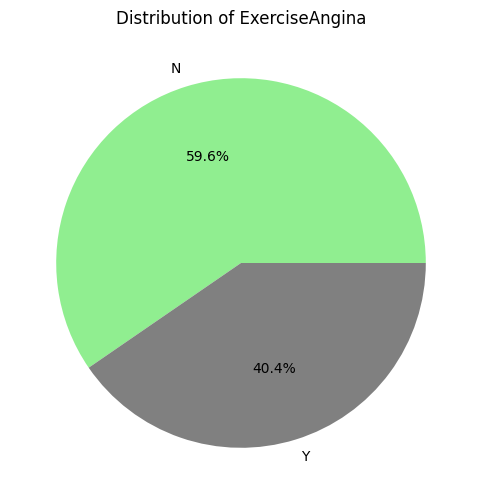

In [58]:
# Desired color palette
palette = ['lightgreen', 'gray', 'lightblue', 'pink', 'purple']  # Adjust colors as needed

# Assuming you have your DataFrame loaded as htf

# Iterate through the specified columns and generate pie charts
for column in ['ChestPainType', 'RestingECG', 'ST_Slope', 'Sex', 'ExerciseAngina']:
    # Get value counts and sort in descending order (corrected keyword argument)
    value_counts = htf[column].value_counts().sort_values(ascending=False)

    # Get pie chart slice labels and values
    slice_labels = value_counts.index.to_numpy()
    slice_values = value_counts.to_numpy()

    # Create the pie chart with the specified palette
    plt.figure(figsize=(6, 6))  # Adjust figure size as needed
    plt.pie(slice_values, labels=slice_labels, autopct="%1.1f%%", colors=palette[:len(slice_labels)])
    plt.title(f"Distribution of {column}")

<h1> Distribution of HeartDisease By AgE

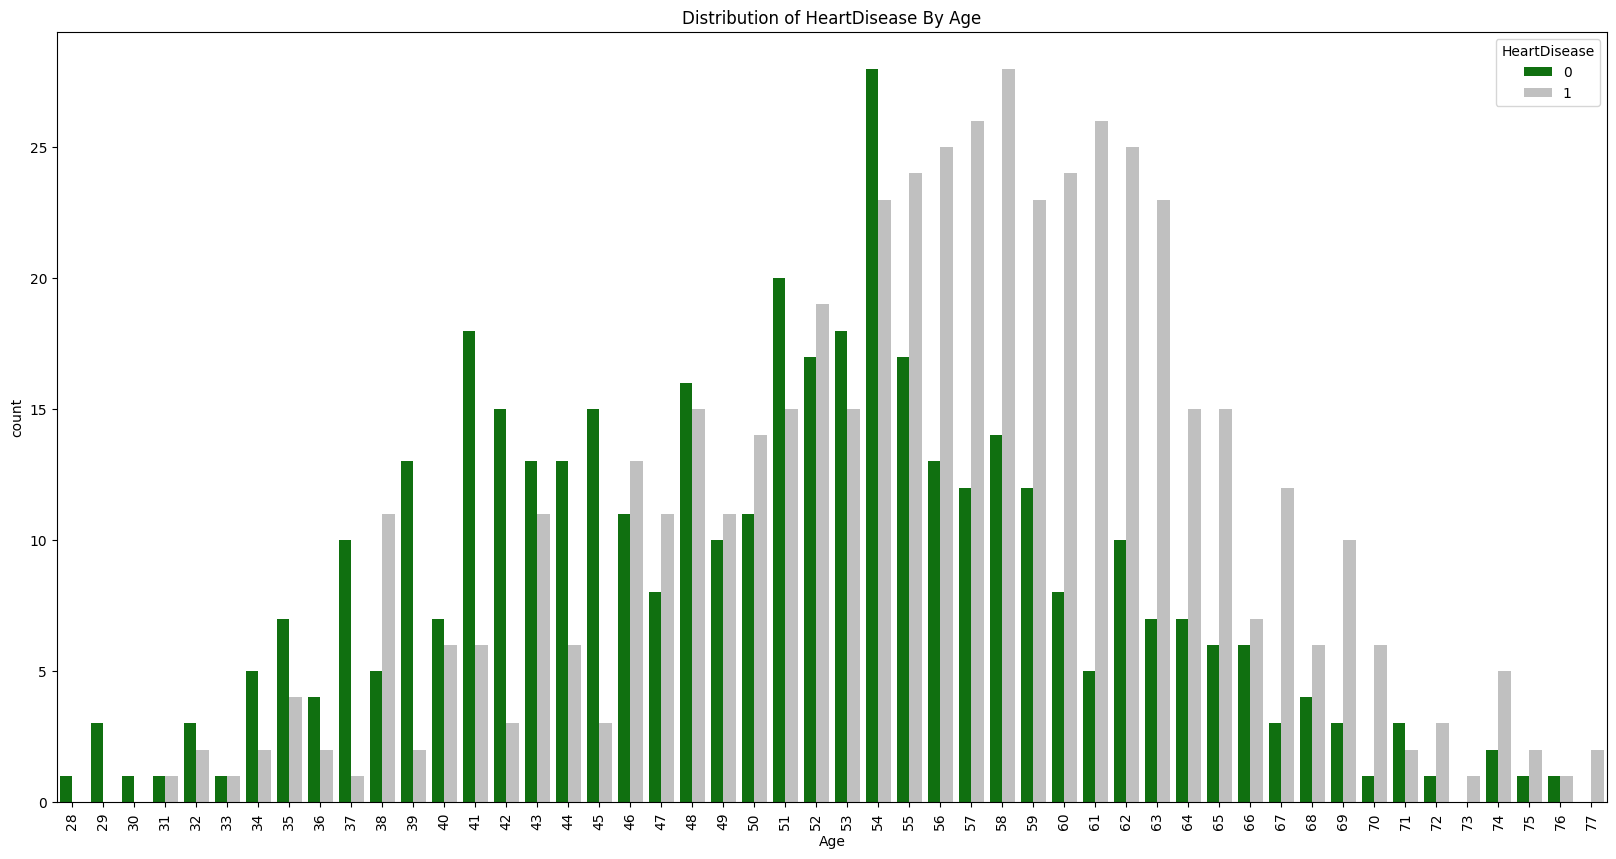

In [59]:
plt.figure(figsize=(20, 10))
sns.countplot(x = htf['Age'] , hue=htf['HeartDisease'], palette=['green', 'silver'])  # Apply colors
plt.title('Distribution of HeartDisease By Age')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

<h1>Distribution of HeartDisease By Sex</h1>


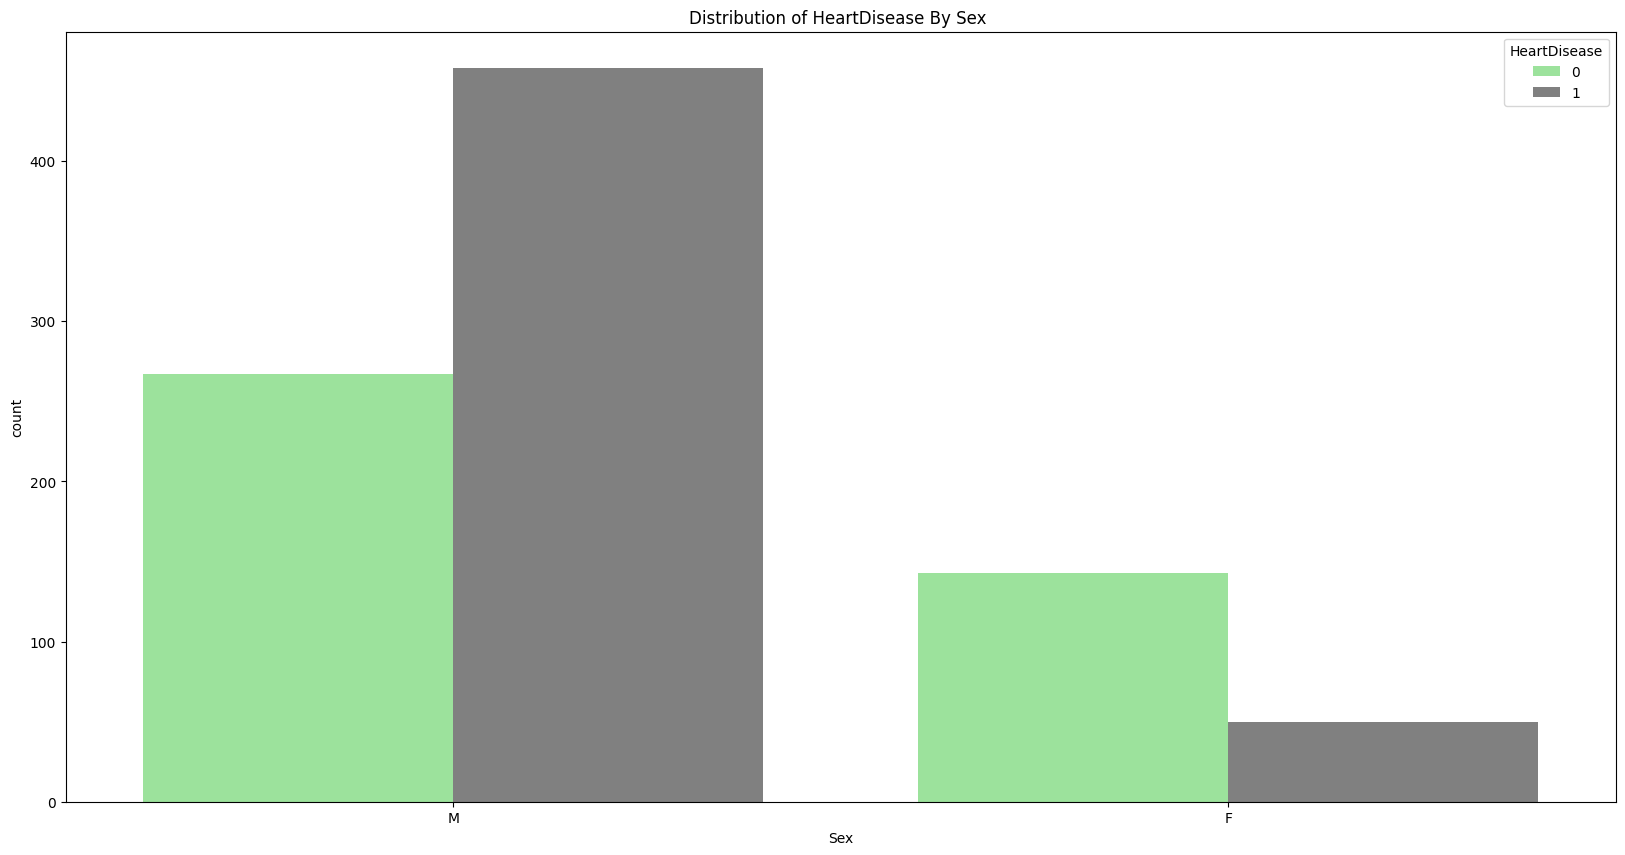

In [60]:
plt.figure(figsize=(20, 10))
sns.countplot(x = htf['Sex'] , hue=htf['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By Sex ')
plt.show()

<h1> HeartDisease By hest Paint Type</h1>

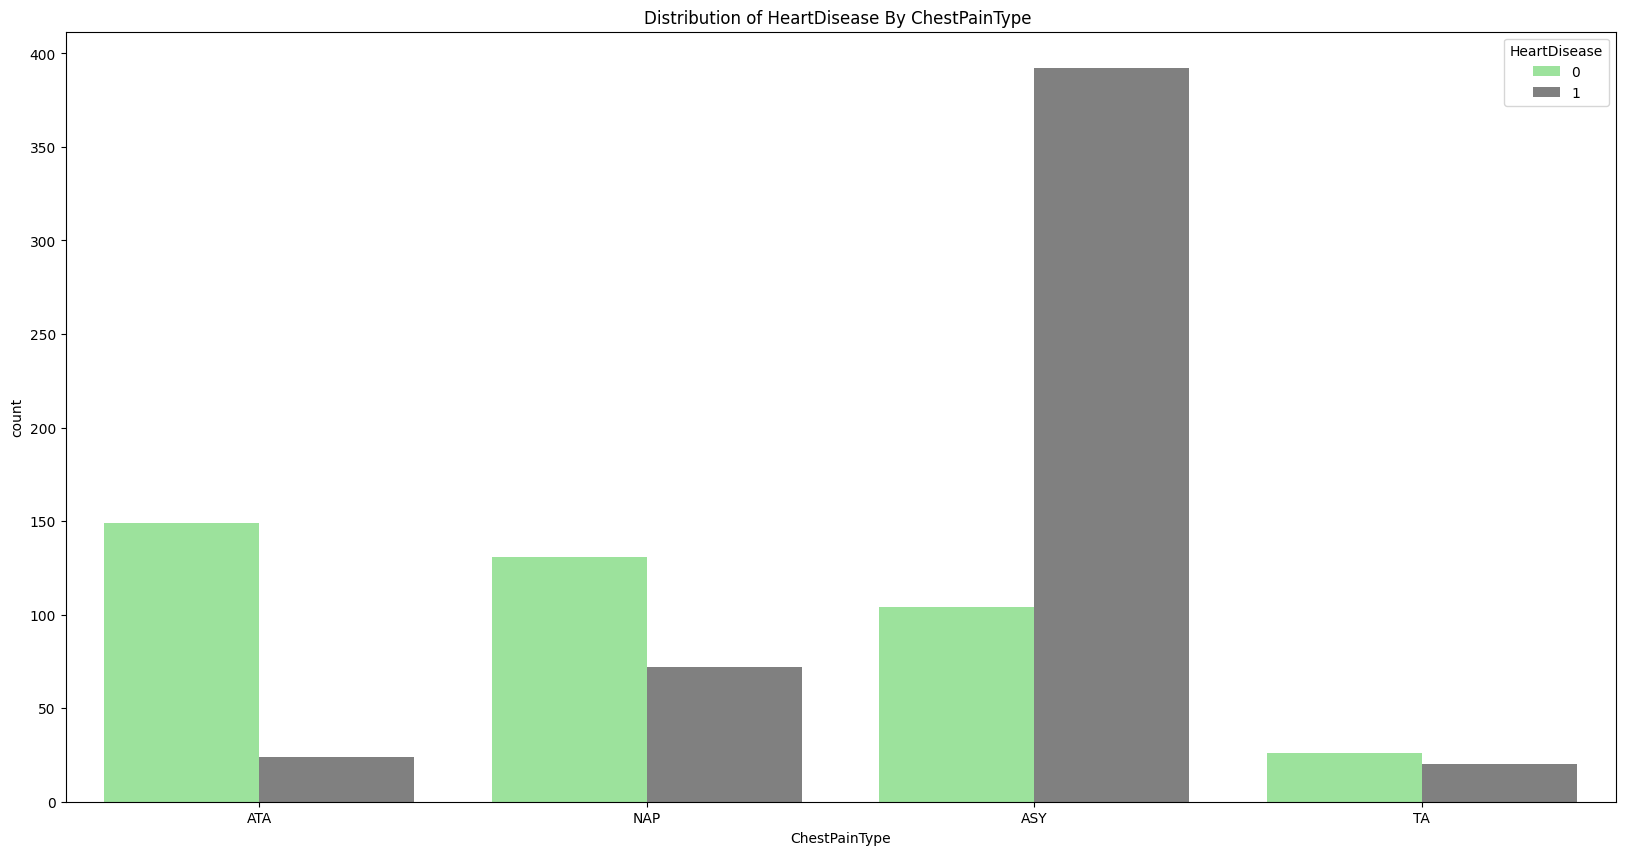

In [61]:
plt.figure(figsize=(20, 10))
sns.countplot(x = htf['ChestPainType'] , hue=htf['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By ChestPainType ')
plt.show()

Distribution of HeartDisease By RestingBP

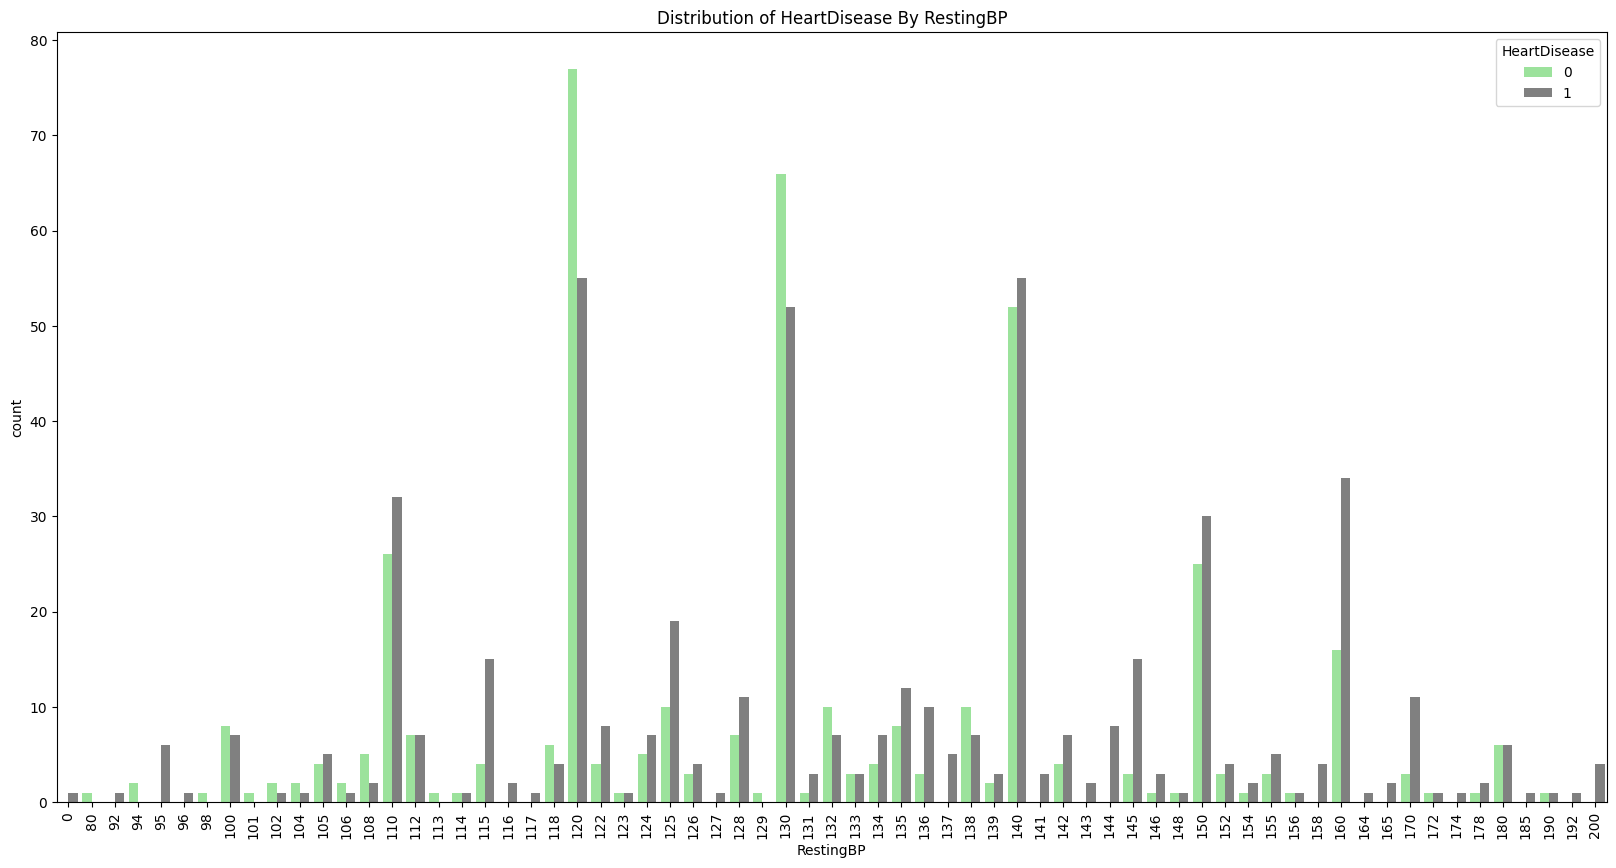

In [62]:
plt.figure(figsize=(20, 10))
sns.countplot(x = htf['RestingBP'] , hue=htf['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By RestingBP')  # Corrected title
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

Distribution of HeartDisease By FastingBS

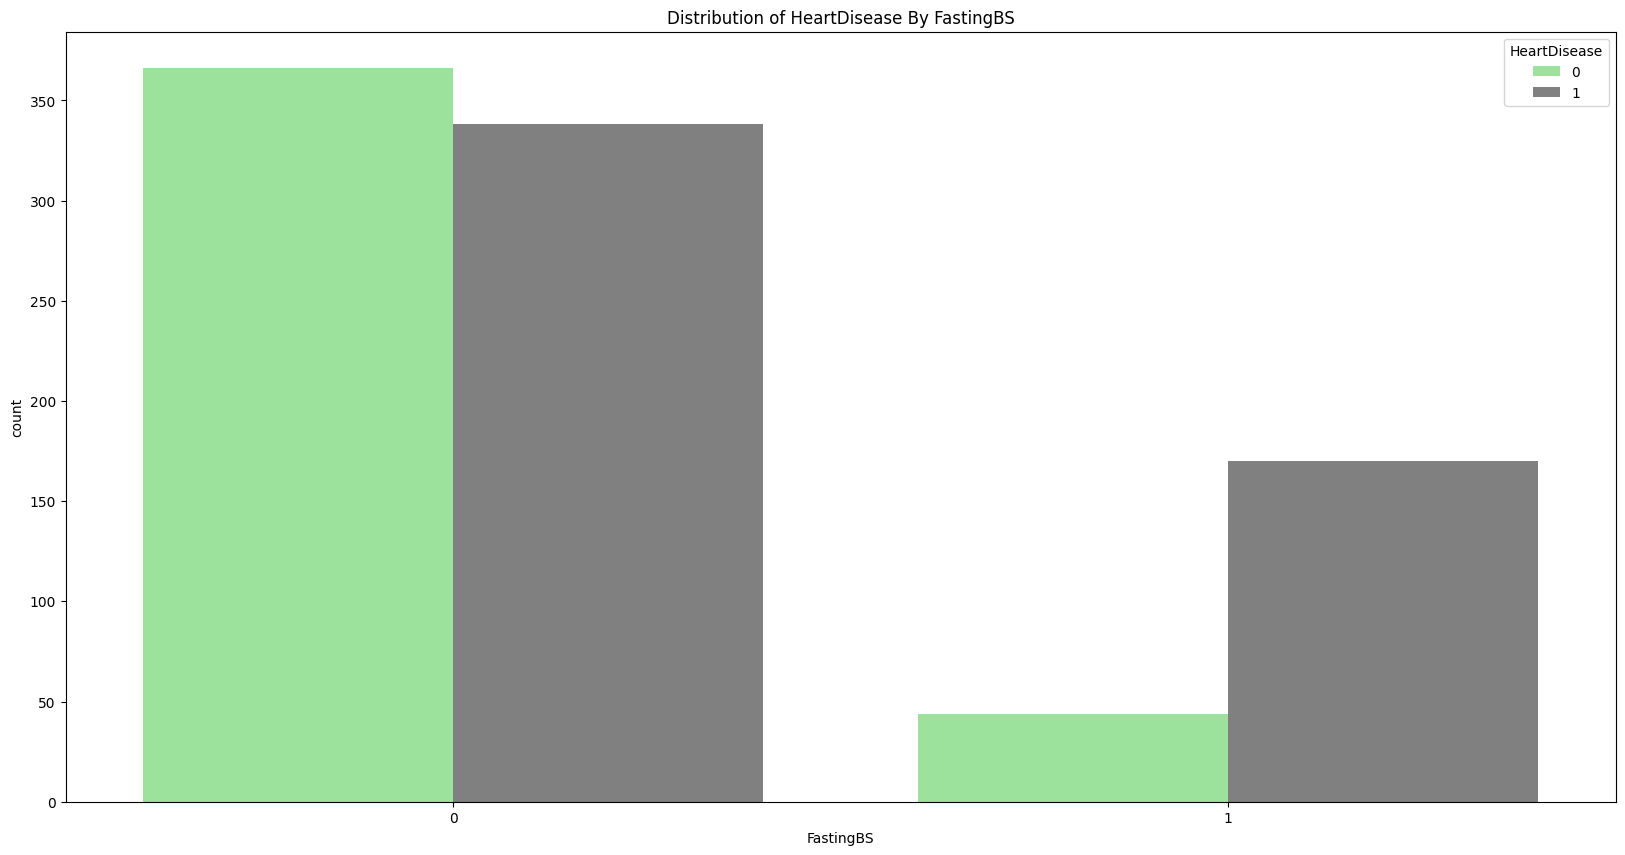

In [63]:
plt.figure(figsize=(20, 10))
sns.countplot(x = htf['FastingBS'] , hue=htf['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By FastingBS')  # Corrected title
plt.show()

Distribution of HeartDisease By MaxHR

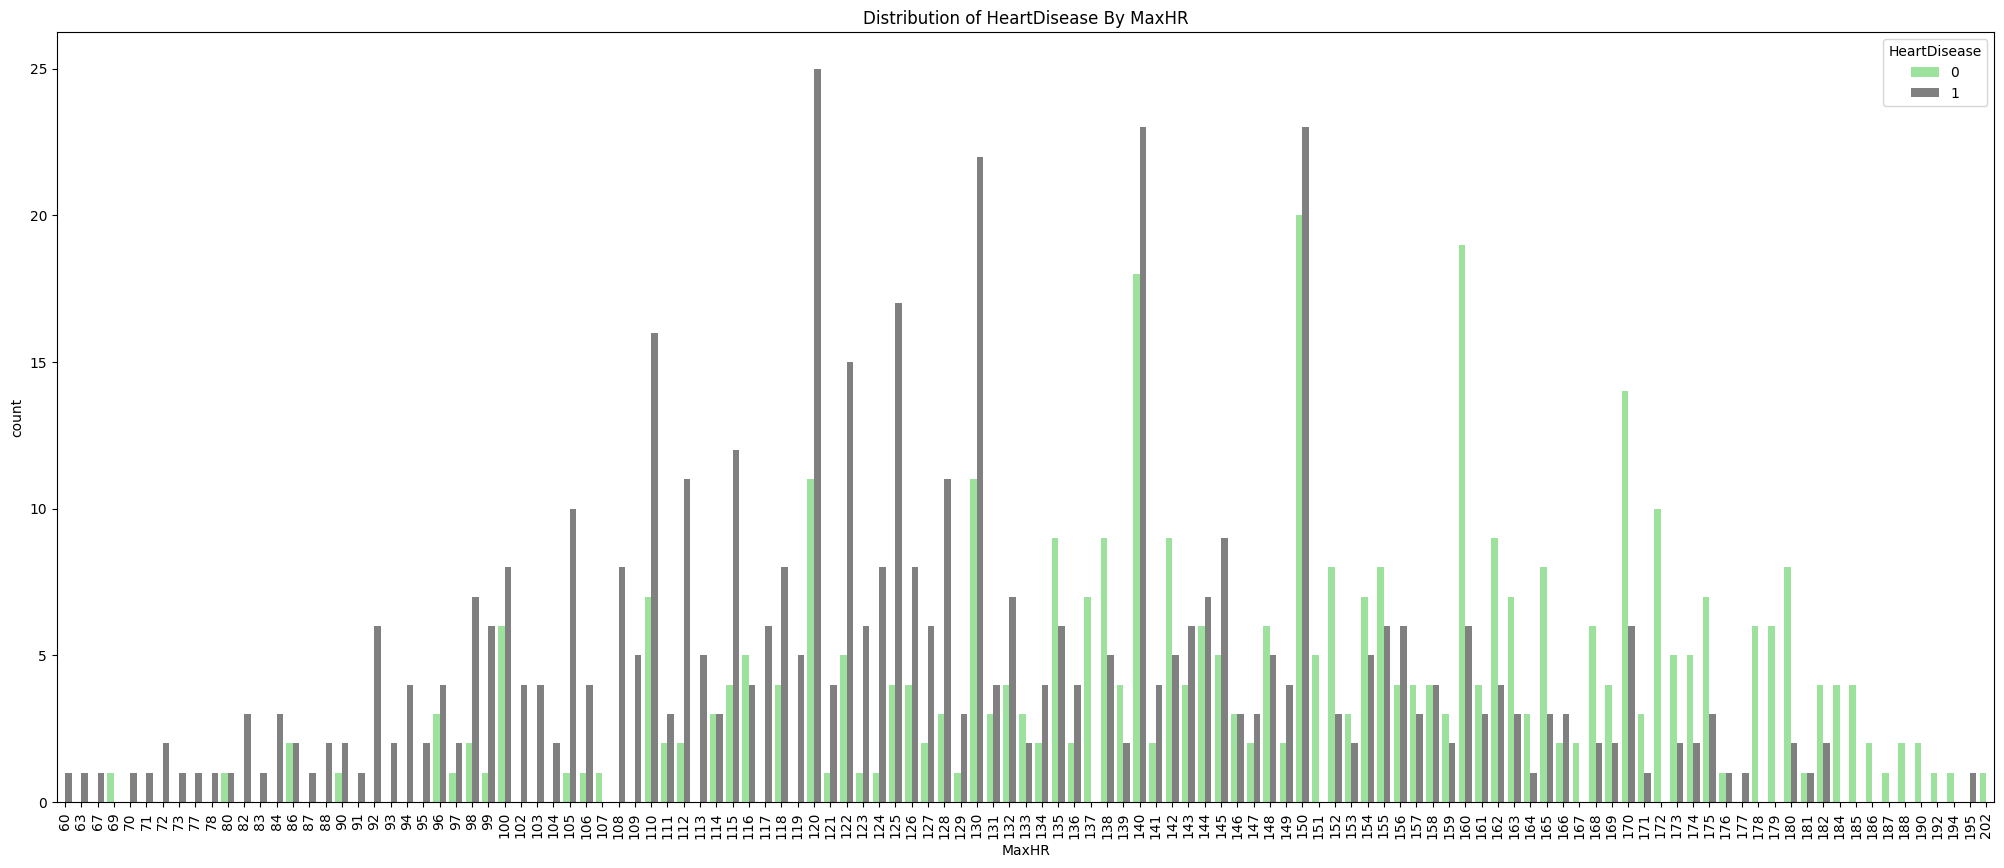

In [65]:
plt.figure(figsize=(25, 10))
sns.countplot(x = htf['MaxHR'] , hue=htf['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By MaxHR')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

<h1>Distribution of Heart Disease By Exercise Angina</h1>

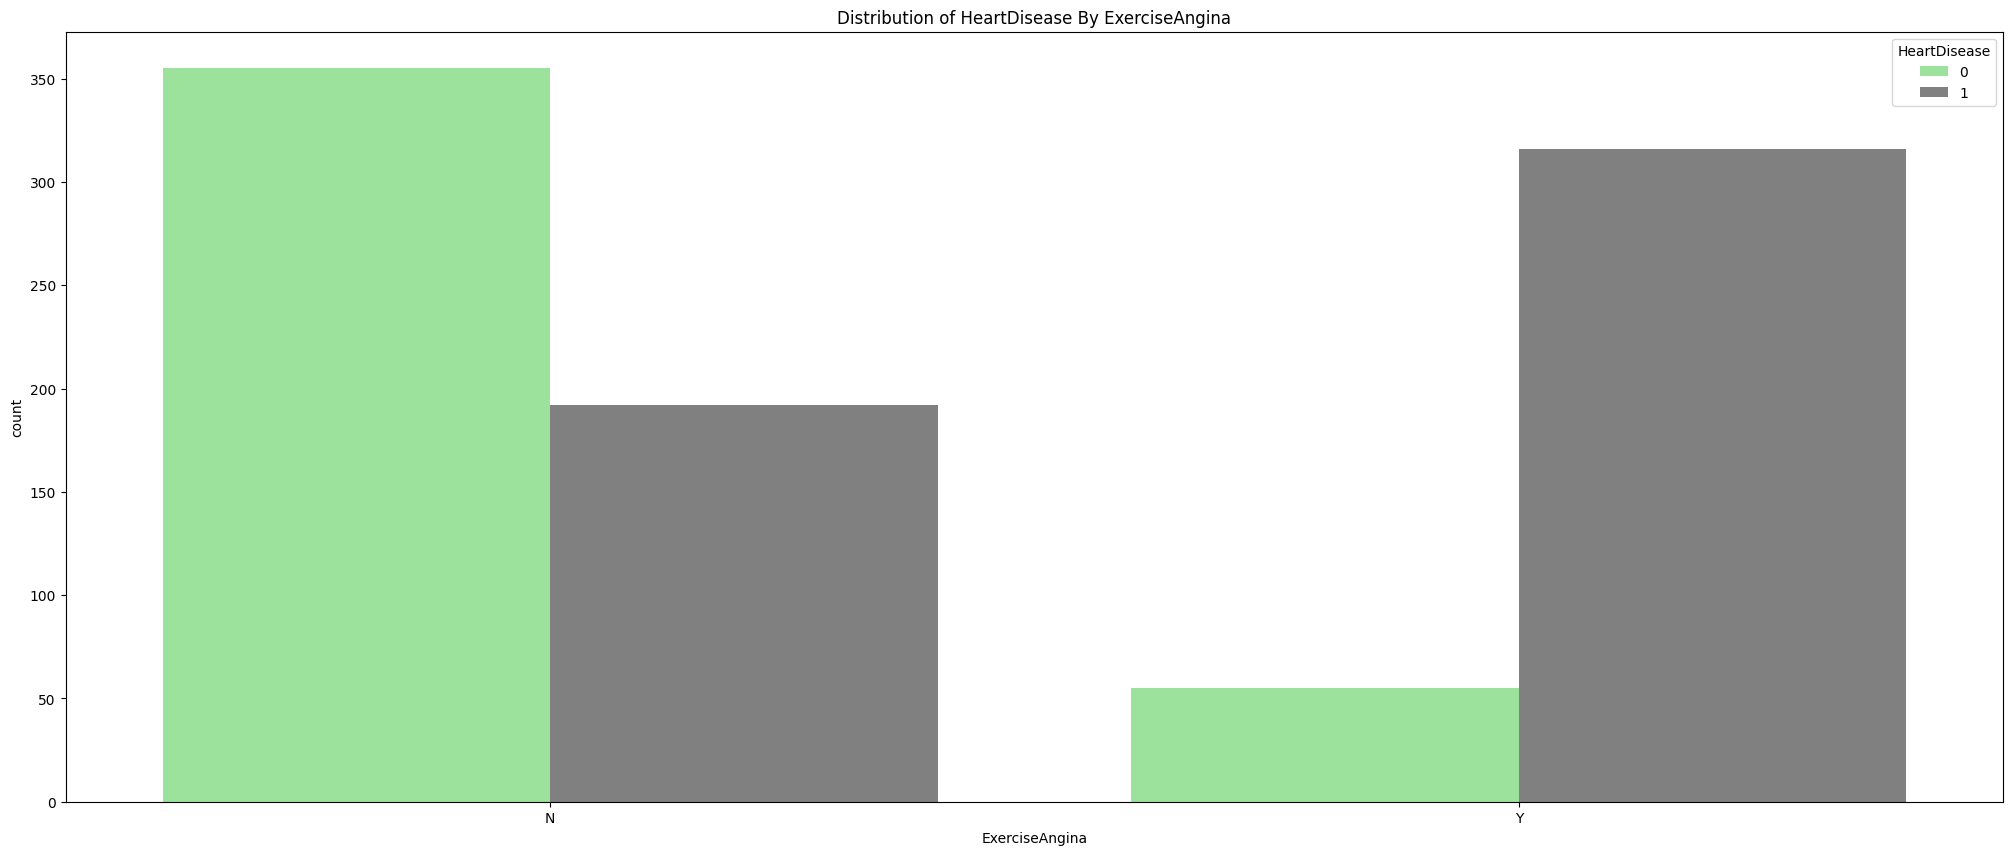

In [66]:
plt.figure(figsize=(25, 10))
sns.countplot(x = htf['ExerciseAngina'] , hue=htf['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By ExerciseAngina')
plt.show()

<h1> HEartDisease by Oldpeak</h1>

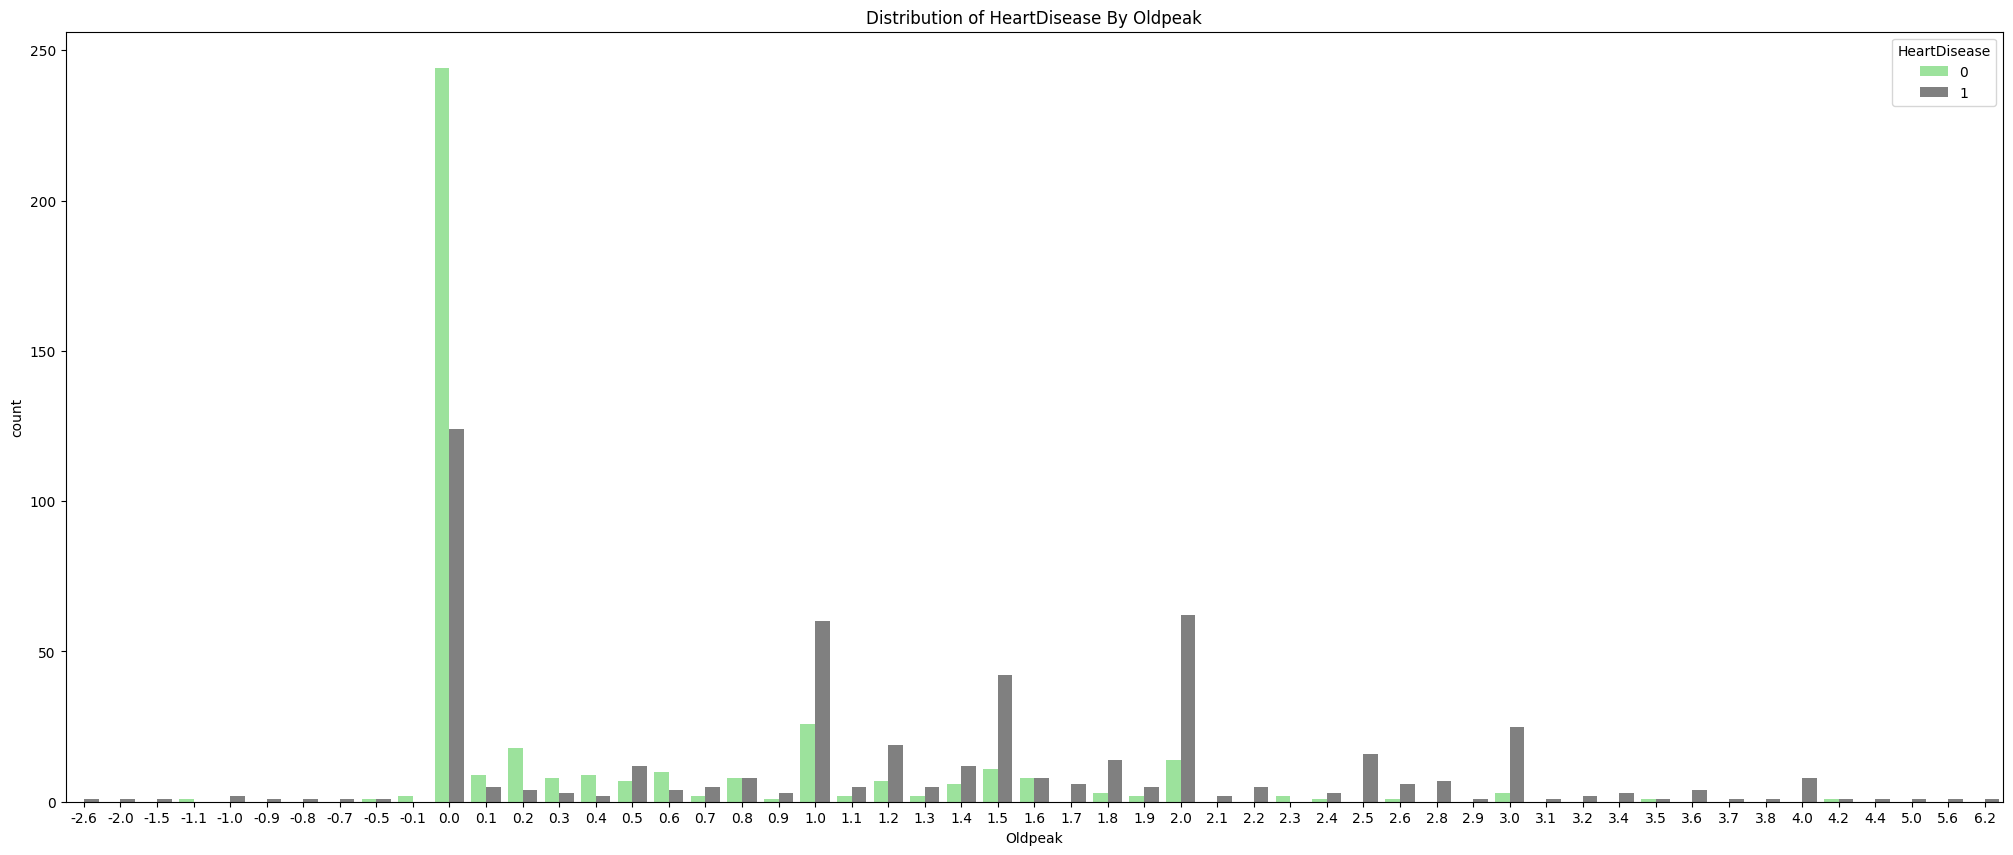

In [67]:
plt.figure(figsize=(25, 10))
sns.countplot(x = htf['Oldpeak'] , hue=htf['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By Oldpeak')
plt.show()

<h1>HeartDisease By ST_Slope</h1>


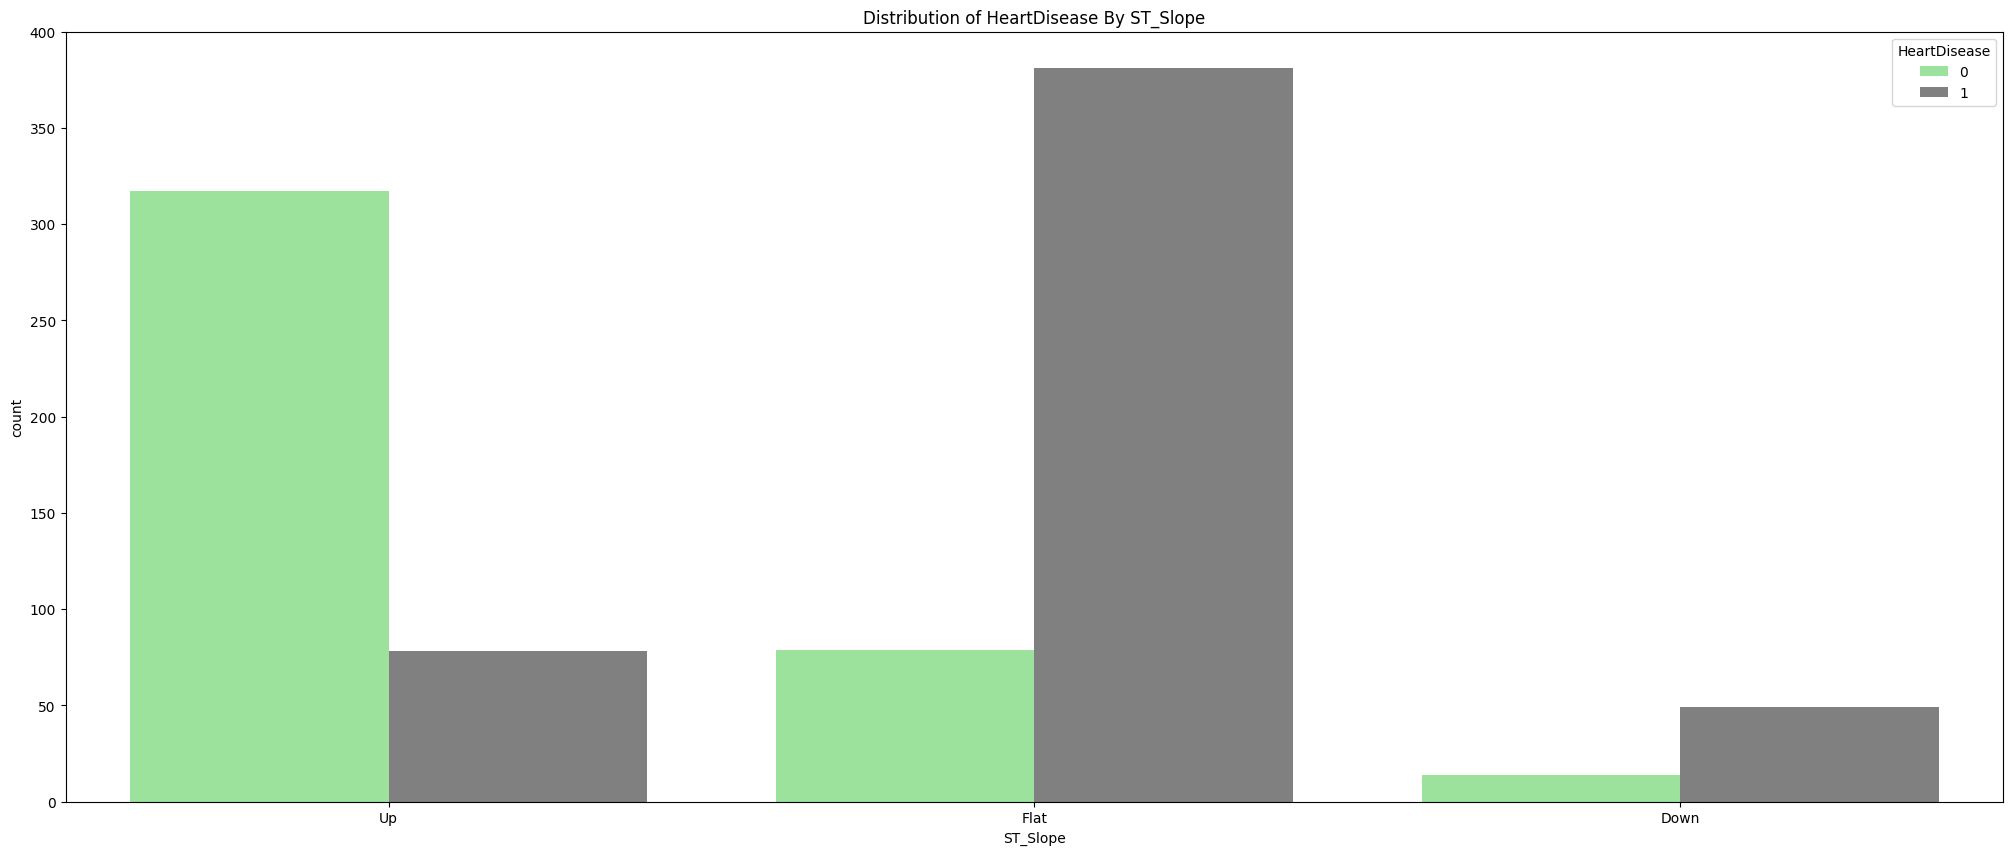

In [68]:
plt.figure(figsize=(25, 10))
sns.countplot(x = htf['ST_Slope'] , hue=htf['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By ST_Slope')
plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

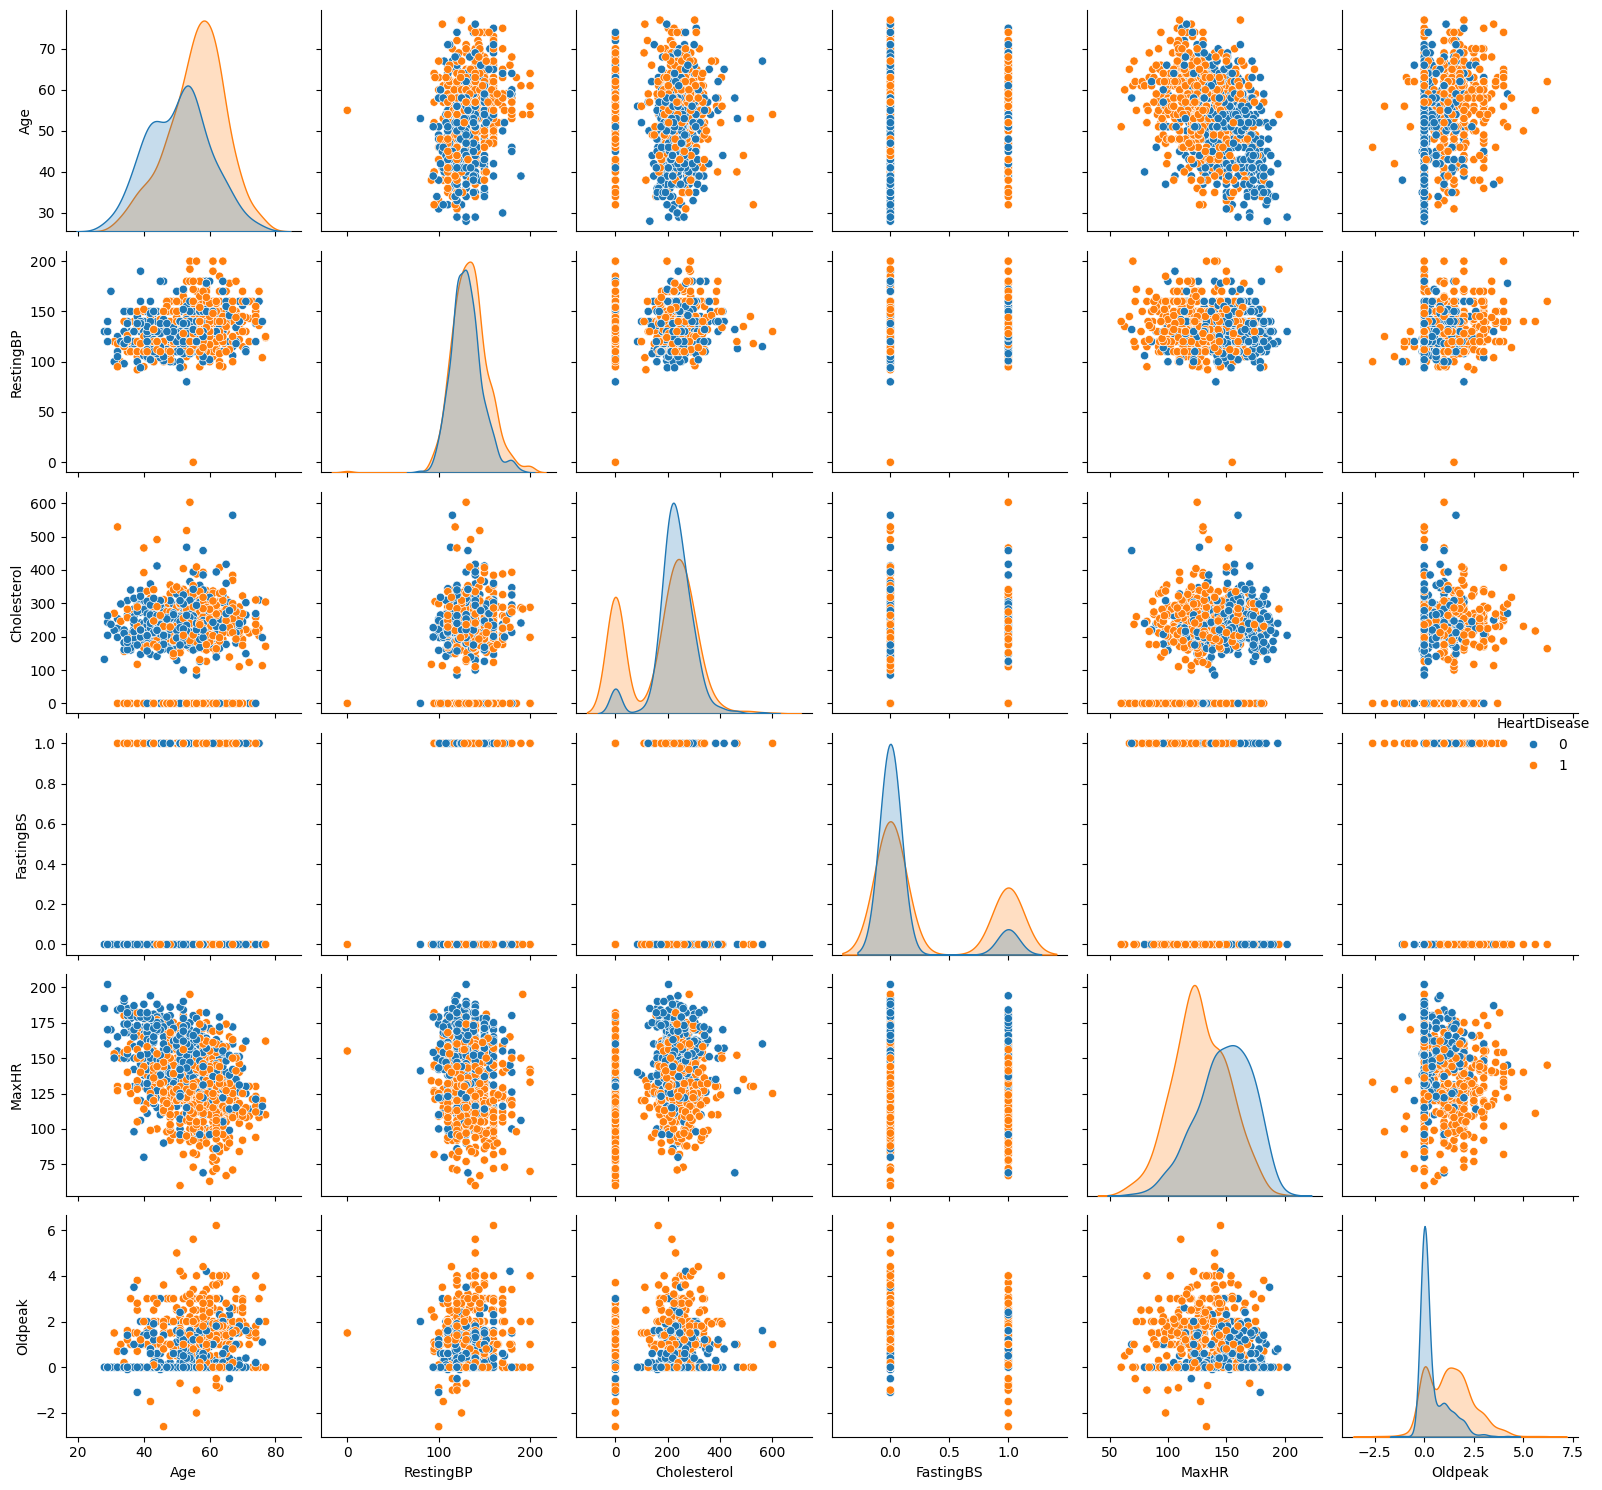

In [70]:
plt.figure(figsize=(15,10))
sns.pairplot(htf,hue="HeartDisease")
plt.tight_layout()
plt.plot()

<h1><I>Correlation heatmap</I></h1>

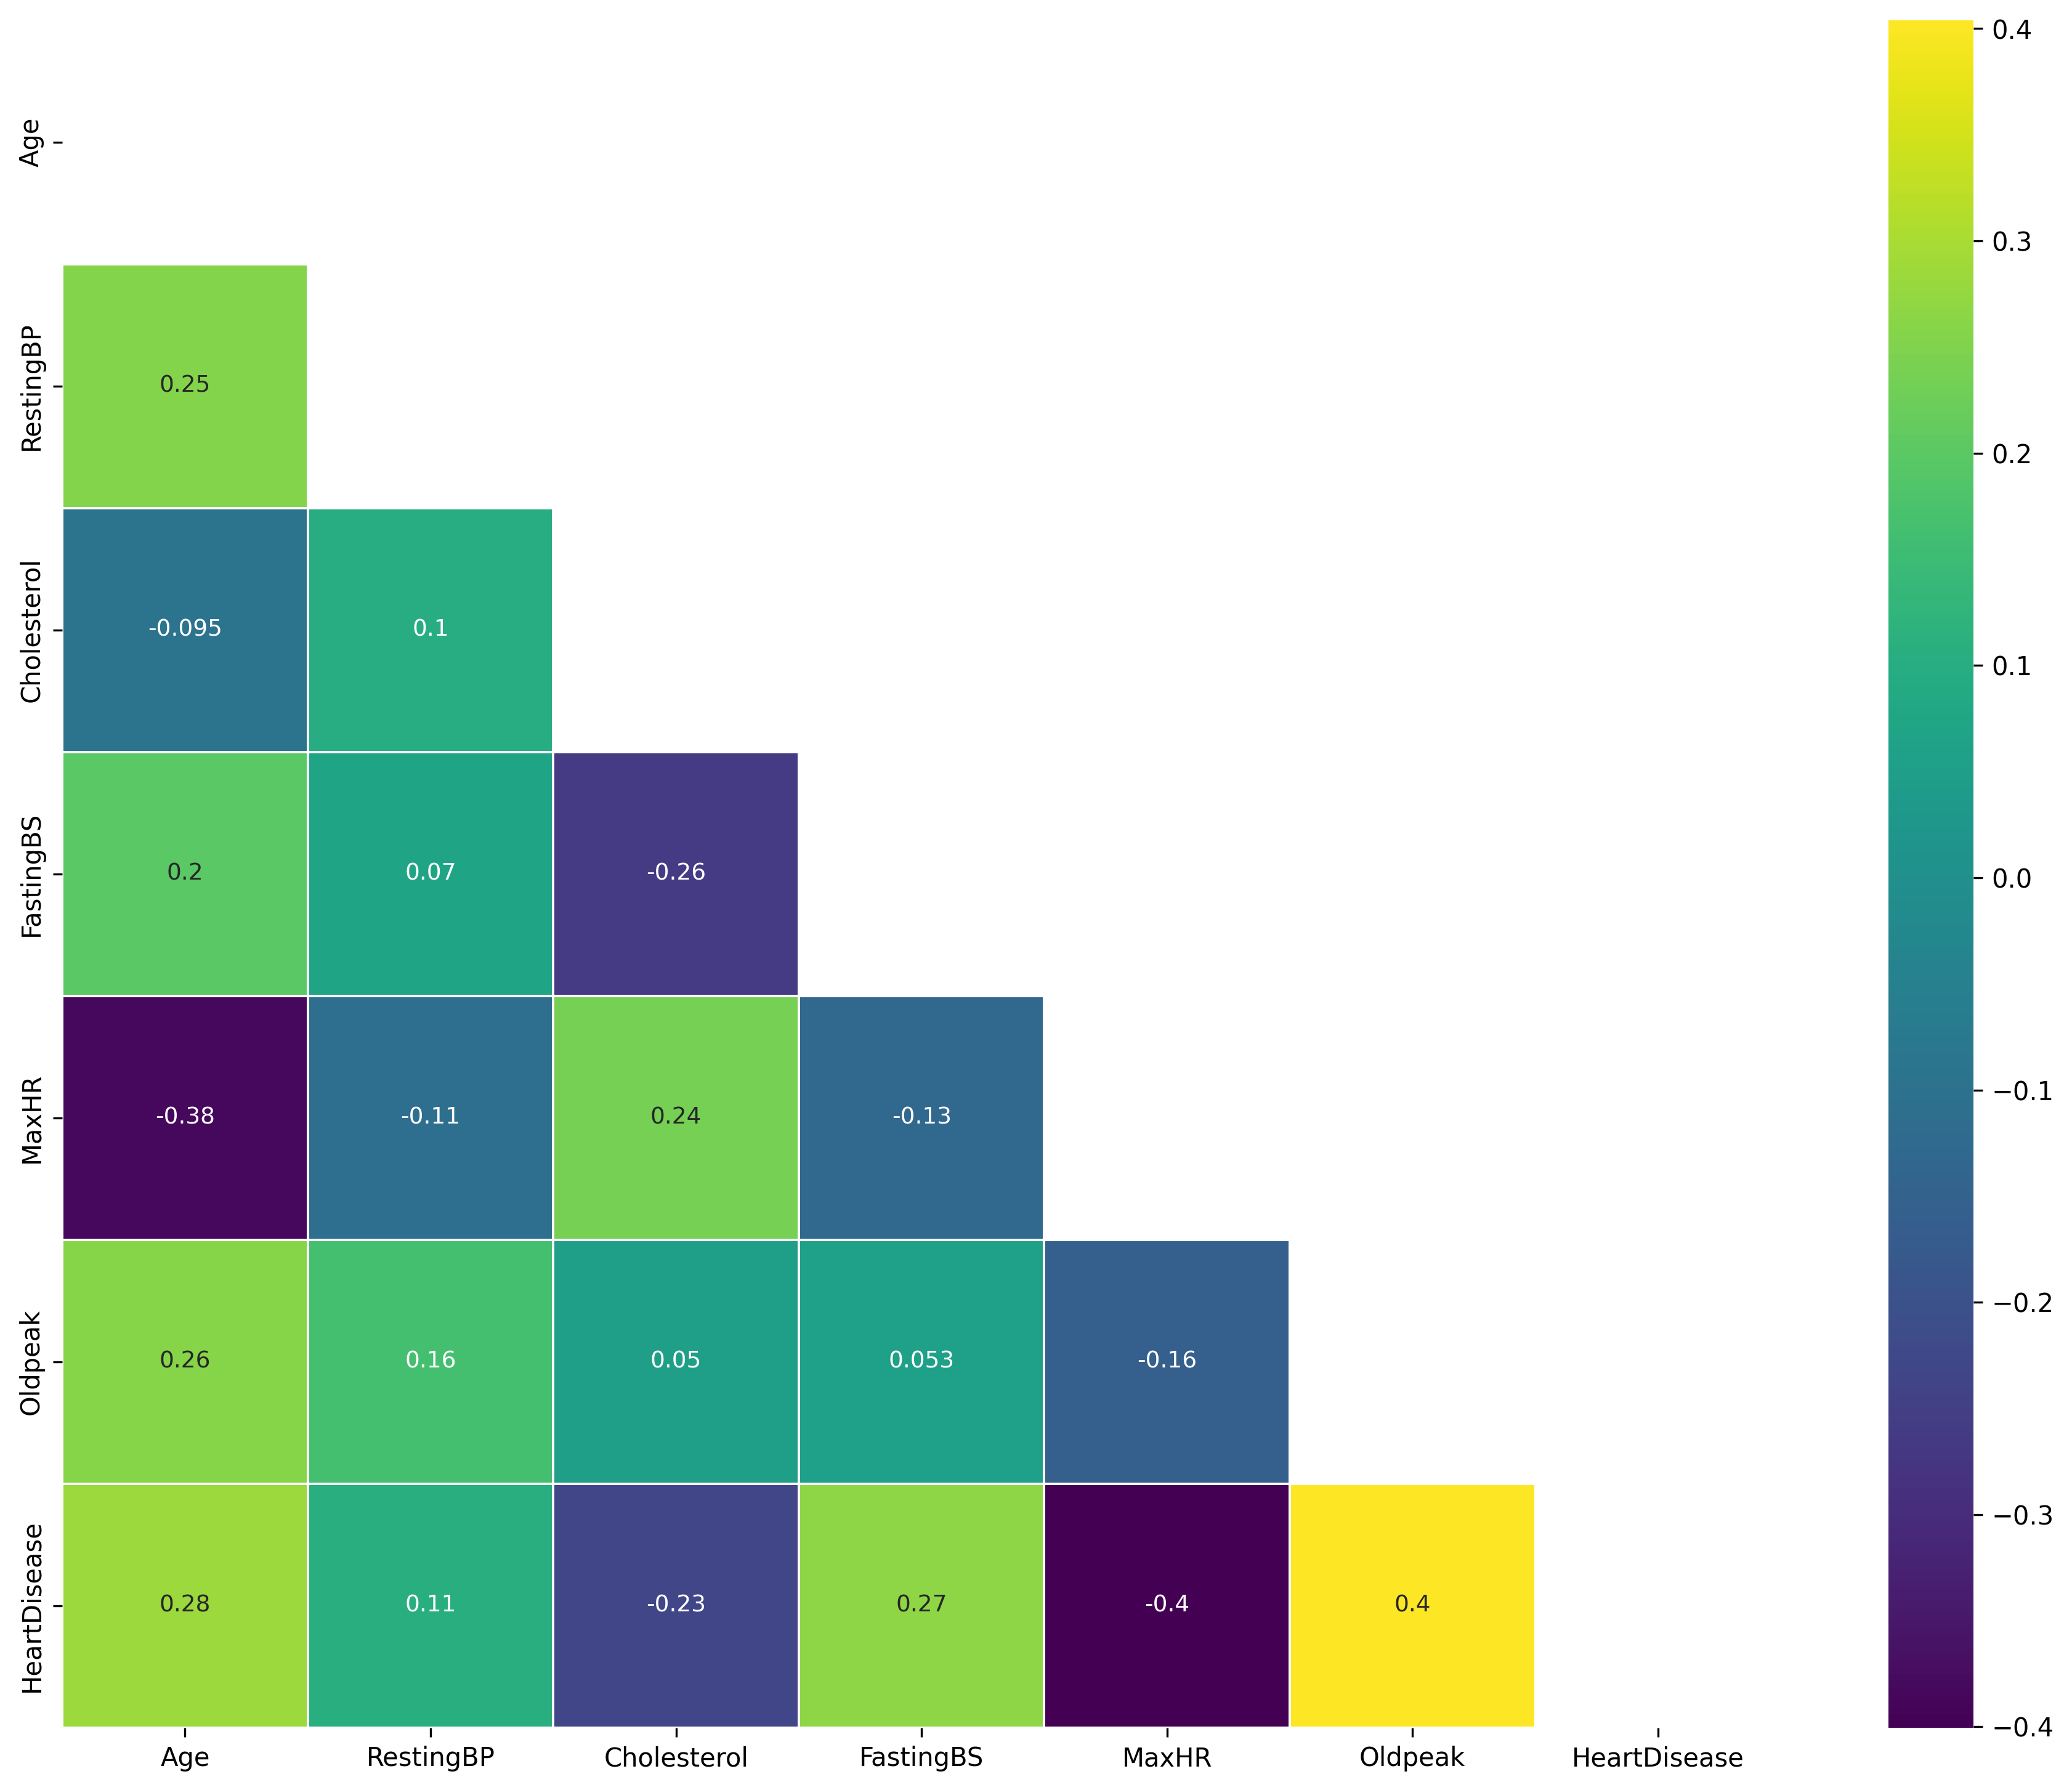

In [72]:
htf['Age'] = pd.to_numeric(htf['Age'], errors='coerce')

# Filter numeric columns
numeric_columns = htf.select_dtypes(include=[np.number]).columns

# Create a DataFrame containing only numeric columns
numeric_df = htf[numeric_columns]

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(15, 12), dpi=300)
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='viridis', linewidth=.5, annot_kws={'size': 9})
plt.show()